In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE, SelectFromModel, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
print(X[1, :])
print(X.shape)

[4.9 3.  1.4 0.2]
(150, 4)


In [5]:
# In order to test the effectness of different feature selection methods, we add some noise features to the dataset.
np.random.seed(100)
E = np.random.uniform(0, 1, size=(len(X), 10))
X = np.hstack((X, E))
X.shape

(150, 24)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train.shape

(105, 24)

In [7]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
X_train_remove_variance.shape
# Variance threshold is applied but since the noise valued columns have non-zero variance, they aren't deleted

(105, 24)

**********

In [8]:
# Since this is iris dataset we are working on, we will use classfication techniques
# Analysis Of Variance (ANOVA)
sel_f = SelectKBest(f_classif, k=4)
X_train_f = sel_f.fit_transform(X_train, y_train)

print(sel_f.get_support())
print(sel_f.get_params())

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False]
{'k': 4, 'score_func': <function f_classif at 0x7f94a947def0>}


In [9]:
# Chi2 Test
sel_chi2 = SelectKBest(chi2, k=4) # select 4 features
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)

print(sel_chi2.get_support())
print(sel_chi2.get_params())

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False]
{'k': 4, 'score_func': <function chi2 at 0x7f94a9481320>}


In [10]:
# mutual_info_classif Test
sel_mutual = SelectKBest(mutual_info_classif, k=4)
X_train_mutual = sel_mutual.fit_transform(X_train, y_train)

print(sel_mutual.get_support())
print(sel_mutual.get_params())

[ True  True  True  True False False False False False False False False
 False False False False False False False False False False False False]
{'k': 4, 'score_func': <function mutual_info_classif at 0x7f94a6f06560>}


Recursive Feature Elimination

In [11]:
model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
sel_rfe_tree = RFE(estimator=model_tree, n_features_to_select=4, step=1)
X_train_rfe_tree = sel_rfe_tree.fit_transform(X_train, y_train)
print(sel_rfe_tree.get_support())

[ True False  True  True False False False False False False False False
 False False False False False False  True False False False False False]


PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [13]:
x = StandardScaler().fit_transform(X)
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

In [14]:
pca = PCA(n_components=2)

In [15]:
principalComponents = pca.fit_transform(x)

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
principalDf.head(5)

,principal component 1,principal component 2
0,1.219693,-2.121922
1,3.528068,0.874835
2,1.523896,1.098059
3,4.016180,2.145598
4,2.760409,-1.364915


In [21]:
# Getting Target variable from the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
y = df.loc[:,['target']].values

In [22]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,1.219693,-2.121922,Iris-setosa
1,3.528068,0.874835,Iris-setosa
2,1.523896,1.098059,Iris-setosa
3,4.016180,2.145598,Iris-setosa
4,2.760409,-1.364915,Iris-setosa


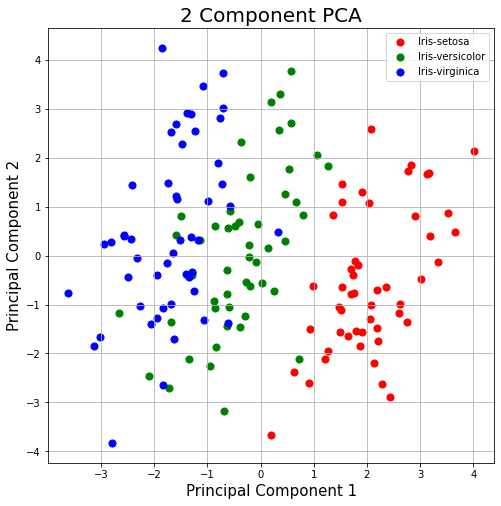

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [24]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf1 = pd.concat([principalDf1, df[['target']]], axis = 1)
finalDf1.head(5)

,principal component 1,principal component 2,principal component 3,target
0,1.219693,-2.121922,-0.902866,Iris-setosa
1,3.528068,0.874835,3.344303,Iris-setosa
2,1.523896,1.098059,-3.276276,Iris-setosa
3,4.016180,2.145598,2.626826,Iris-setosa
4,2.760409,-1.364915,0.803314,Iris-setosa


In [25]:
import plotly.express as px
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
fig = px.scatter_3d(finalDf1,x='principal component 1',y='principal component 2',z='principal component 3',color='target')
fig.show()

In [26]:
import plotly.express as px
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
fig = px.scatter_3d(finalDf1,x="principal component 1",y="principal component 2",z="principal component 3",color="target")
fig.show()

In [27]:
#Before using Feature Selection
model_logistic = LogisticRegression(multi_class='multinomial', max_iter=1000)
model_logistic.fit(X_train, y_train)
predict = model_logistic.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[14  0  0]
 [ 0 16  2]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      0.89      0.89        18
           2       0.85      0.85      0.85        13

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [28]:
#After using Feature Selection
model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)
model_logistic.fit(X_train_f, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
X_test_f = sel_f.transform(X_test)
print(X_test.shape)
print(X_test_f.shape)

(45, 24)
(45, 4)


In [30]:
predict = model_logistic.predict(X_test_f)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

